# Pandemic Data Science | EDA - Hospital Dataset

---

## Goal

The goal of this analysis is to figure out the important features that determine the case counts in a given district

In [1]:
# # Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Government Hospitals (Urban, Rural) Dataset

In [2]:
govt_hospitals_data = pd.read_csv("../Datasets/hospitals/Number of Government Hospitals and Beds in Rural and Urban Areas .csv")
govt_hospitals_data = govt_hospitals_data.rename(columns={
    'States/UTs':'state'
})

govt_hospitals_data = govt_hospitals_data.iloc[:,:-1]

In [3]:
govt_hospitals_data

,state,Rural hospitals,n_beds_rural,Urban hospitals,n_beds_urban
0,Andhra Pradesh,193,6480,65,16658
1,Arunachal Pradesh,208,2136,10,268
2,Assam,1176,10944,50,6198
3,Bihar,930,6083,103,5936
4,Chhattisgarh,169,5070,45,4342
5,Goa,17,1405,25,1608
6,Gujarat,364,11715,122,20565
7,Haryana,609,6690,59,4550
8,Himachal Pradesh,705,5665,96,6734
9,Jammu & Kashmir,56,7234,76,4417


### Hospitals maintained by Railway

In [4]:
rail_hospitals_data = pd.read_csv("../Datasets/hospitals/Hospitals and beds maintained by Railways.csv")
rail_hospitals_data = rail_hospitals_data.rename(columns={
    'n_hospitals':'n_hospitals_rail',
    'n_beds':'n_beds_rail'
})
rail_hospitals_data.head()

,Zone,n_hospitals_rail,n_beds_rail
0,Central Railway,11,1164
1,Eastern Railway,8,1587
2,East central Railway,9,819
3,East coast Railway,4,339
4,Northern Railway,9,1101


### Hospitals maintained by Ministry of defence

In [5]:
def_hospitals_data = pd.read_csv("../Datasets/hospitals/Hospitals and Beds maintained by Ministry of Defence.csv")
def_hospitals_data = def_hospitals_data.rename(columns={
    'State':'state',
    'n_hospitals':'n_hospitals_def',
    'n_beds':'n_beds_def'
})
def_hospitals_data['state']

0                         Assam
1                Andhra Pradesh
2     Andaman & Nicobar Islands
3             Arunachal Pradesh
4                         Bihar
5                         Delhi
6                           Goa
7                       Gujarat
8                       Haryana
9              Himachal Pradesh
10              Jammu & Kashmir
11                    Jharkhand
12                    Karnataka
13                       Kerala
14               Madhya Pradesh
15                   Maharastra
16                      Manipur
17                    Meghalaya
18                     Nagaland
19                       Odisha
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
Name: state, dtype: object

### Hospitals state-wise
The dataset includes columns
1. **PHC**: Public Health Care Facilities
1. **CHC**: Community Health Care Centers
1. **SDH**: Sub-District/Divisional Hospitals
1. **DH**: District Hospitals

In [6]:
state_wise_hospitals_data = pd.read_csv("../Datasets/hospitals/Hospitals_and_Beds_statewise.csv")
state_wise_hospitals_data = state_wise_hospitals_data.rename(columns={
    'n_beds':'n_beds_state'
})
state_wise_hospitals_data

,state,PHC,CHC,SDH,DH,Total,n_beds_state
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31.0,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14.0,33,1220,19115
4,Bihar,2007,63,33.0,43,2146,17796
5,Chandigarh,40,2,1.0,4,47,3756
6,Chhattisgarh,813,166,12.0,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9.0,47,615,20572


In [7]:
# remove NaN values with 0
state_wise_hospitals_data = state_wise_hospitals_data.fillna(0)
state_wise_hospitals_data['state']

0     Andaman & Nicobar Islands
1                Andhra Pradesh
2             Arunachal Pradesh
3                         Assam
4                         Bihar
5                    Chandigarh
6                  Chhattisgarh
7          Dadra & Nagar Haveli
8                   Daman & Diu
9                         Delhi
10                          Goa
11                      Gujarat
12                      Haryana
13             Himachal Pradesh
14              Jammu & Kashmir
15                    Jharkhand
16                    Karnataka
17                       Kerala
18                  Lakshadweep
19               Madhya Pradesh
20                  Maharashtra
21                      Manipur
22                    Meghalaya
23                      Mizoram
24                     Nagaland
25                       Odisha
26                   Puducherry
27                       Punjab
28                    Rajasthan
29                       Sikkim
30                   Tamil Nadu
31      

### Employees State Insurance Corporation Hospitals and beds

In [8]:
emp_hospitals_data = pd.read_csv("../Datasets/hospitals/Employees State Insurance Corporation .csv")
emp_hospitals_data = emp_hospitals_data.rename(columns={
    'n_hospitals':'n_hospitals_emp',
    'n_beds':'n_beds_emp'
})

In [9]:
def_hospitals_data.loc[def_hospitals_data['state'] == 'Maharastra', 'state'] = 'Maharashtra'
govt_hospitals_data.shape

(36, 5)

## Merging all datasets

In [10]:
temp = pd.merge(govt_hospitals_data, def_hospitals_data, on='state', how='outer')
state_temp = pd.merge(temp, state_wise_hospitals_data, on='state', how='outer')
final_hospitals_data = pd.merge(state_temp, emp_hospitals_data, on='state', how='outer')

In [11]:
final_hospitals_data.head()

,state,Rural hospitals,n_beds_rural,Urban hospitals,n_beds_urban,n_hospitals_def,n_beds_def,PHC,CHC,SDH,DH,Total,n_beds_state,n_hospitals_emp,n_beds_emp
0,Andhra Pradesh,193,6480,65,16658,1.0,306.0,1417,198,31.0,20,1666,60799,5.0,345.0
1,Arunachal Pradesh,208,2136,10,268,1.0,198.0,122,62,0.0,15,199,2320,NaN,NaN
2,Assam,1176,10944,50,6198,8.0,2357.0,1007,166,14.0,33,1220,19115,1.0,75.0
3,Bihar,930,6083,103,5936,2.0,348.0,2007,63,33.0,43,2146,17796,3.0,50.0
4,Chhattisgarh,169,5070,45,4342,NaN,NaN,813,166,12.0,32,1023,14354,0.0,0.0


Adding Active Cases (state-wise) column at the end to perform EDA

In [12]:
state_data = pd.read_csv("../final_datasets/states_data.csv")
state_active_data = state_data[['statename', 'Active', 'Recovered']]
state_active_data = state_active_data.rename(columns={
    'statename':'state'
})
wrong_names = ['Chhatisgarh', 'NCT of Delhi', 'Orissa', 'Pondicherry']
right_names = ['Chhattisgarh', 'Delhi', 'Odisha', 'Puducherry']
for w, r in zip(wrong_names, right_names):
    state_active_data.loc[state_active_data['state'] == w, 'state'] = r
state_active_data.loc[state_active_data['state'] == 'Delhi', 'Active'] = 89592
state_active_data.loc[state_active_data['state'] == 'Delhi', 'Recovered'] = 23572
state_active_data

,state,Active,Recovered
0,Andaman & Nicobar Islands,19,32
1,Andhra Pradesh,83650,813435
2,Arunachal Pradesh,547,15251
3,Assam,80177,44101
4,Bihar,96471,398503
5,Chandigarh,5575,33498
6,Chhattisgarh,112561,489690
7,Daman & Diu,479,2154
8,Goa,3617,2371
9,Gujarat,55880,249357


In [13]:
final_hospitals_data = pd.merge(final_hospitals_data, state_active_data, on='state', how='inner')

In [14]:
final_hospitals_data

,state,Rural hospitals,n_beds_rural,Urban hospitals,n_beds_urban,n_hospitals_def,n_beds_def,PHC,CHC,SDH,DH,Total,n_beds_state,n_hospitals_emp,n_beds_emp,Active,Recovered
0,Andhra Pradesh,193,6480,65,16658,1.0,306.0,1417,198,31.0,20,1666,60799,5.0,345.0,83650,813435
1,Arunachal Pradesh,208,2136,10,268,1.0,198.0,122,62,0.0,15,199,2320,NaN,NaN,547,15251
2,Assam,1176,10944,50,6198,8.0,2357.0,1007,166,14.0,33,1220,19115,1.0,75.0,80177,44101
3,Bihar,930,6083,103,5936,2.0,348.0,2007,63,33.0,43,2146,17796,3.0,50.0,96471,398503
4,Chhattisgarh,169,5070,45,4342,NaN,NaN,813,166,12.0,32,1023,14354,0.0,0.0,112561,489690
5,Goa,17,1405,25,1608,2.0,175.0,31,4,2.0,3,40,2666,1.0,15.0,3617,2371
6,Gujarat,364,11715,122,20565,5.0,666.0,1770,385,44.0,37,2236,41129,12.0,910.0,55880,249357
7,Haryana,609,6690,59,4550,3.0,1458.0,500,131,24.0,28,683,13841,7.0,781.0,51436,269910
8,Himachal Pradesh,705,5665,96,6734,6.0,699.0,516,79,61.0,15,671,8706,2.0,150.0,23641,110071
9,Jammu & Kashmir,56,7234,76,4417,11.0,2643.0,702,87,0.0,29,818,11342,1.0,50.0,17666,113860


In [15]:
final_hospitals_data = final_hospitals_data.fillna(0)
final_hospitals_data

,state,Rural hospitals,n_beds_rural,Urban hospitals,n_beds_urban,n_hospitals_def,n_beds_def,PHC,CHC,SDH,DH,Total,n_beds_state,n_hospitals_emp,n_beds_emp,Active,Recovered
0,Andhra Pradesh,193,6480,65,16658,1.0,306.0,1417,198,31.0,20,1666,60799,5.0,345.0,83650,813435
1,Arunachal Pradesh,208,2136,10,268,1.0,198.0,122,62,0.0,15,199,2320,0.0,0.0,547,15251
2,Assam,1176,10944,50,6198,8.0,2357.0,1007,166,14.0,33,1220,19115,1.0,75.0,80177,44101
3,Bihar,930,6083,103,5936,2.0,348.0,2007,63,33.0,43,2146,17796,3.0,50.0,96471,398503
4,Chhattisgarh,169,5070,45,4342,0.0,0.0,813,166,12.0,32,1023,14354,0.0,0.0,112561,489690
5,Goa,17,1405,25,1608,2.0,175.0,31,4,2.0,3,40,2666,1.0,15.0,3617,2371
6,Gujarat,364,11715,122,20565,5.0,666.0,1770,385,44.0,37,2236,41129,12.0,910.0,55880,249357
7,Haryana,609,6690,59,4550,3.0,1458.0,500,131,24.0,28,683,13841,7.0,781.0,51436,269910
8,Himachal Pradesh,705,5665,96,6734,6.0,699.0,516,79,61.0,15,671,8706,2.0,150.0,23641,110071
9,Jammu & Kashmir,56,7234,76,4417,11.0,2643.0,702,87,0.0,29,818,11342,1.0,50.0,17666,113860


## Saving Dataset

In [16]:
final_hospitals_data.to_csv("../final_datasets/final_hospitals_data.csv")

---
## EDA

In [17]:
final_hospitals_data = pd.read_csv("../final_datasets/final_hospitals_data.csv")
final_hospitals_data = final_hospitals_data.rename(columns={
    'Total':'total_hospitals_state'
})

In [18]:
final_hospitals_data['state'].shape

(34,)

In [19]:
cols = list(final_hospitals_data.columns)
cols.remove('Unnamed: 0')
cols.remove('state')
cols.remove('Active')
cols.remove('Recovered')

In [20]:
beds_cols = []
hosp_cols = []
for c in cols:
    if 'hospitals' in c:
        hosp_cols.append(c)
    if 'beds' in c:
        beds_cols.append(c)
        
hosp_cols, beds_cols

(['Rural hospitals',
  'Urban hospitals',
  'n_hospitals_def',
  'total_hospitals_state',
  'n_hospitals_emp'],
 ['n_beds_rural', 'n_beds_urban', 'n_beds_def', 'n_beds_state', 'n_beds_emp'])

In [21]:
final_hospitals_data[hosp_cols]
final_hospitals_data['total_hospitals'] = final_hospitals_data[hosp_cols].sum(axis=1)
final_hospitals_data = final_hospitals_data.rename(columns={'sum':'total_beds'})
final_hospitals_data['total_beds'] = final_hospitals_data[beds_cols].sum(axis=1)
final_hospitals_data.head()

,Unnamed: 0,state,Rural hospitals,n_beds_rural,Urban hospitals,n_beds_urban,n_hospitals_def,n_beds_def,PHC,CHC,SDH,DH,total_hospitals_state,n_beds_state,n_hospitals_emp,n_beds_emp,Active,Recovered,total_hospitals,total_beds
0,0,Andhra Pradesh,193,6480,65,16658,1.0,306.0,1417,198,31.0,20,1666,60799,5.0,345.0,83650,813435,1930.0,84588.0
1,1,Arunachal Pradesh,208,2136,10,268,1.0,198.0,122,62,0.0,15,199,2320,0.0,0.0,547,15251,418.0,4922.0
2,2,Assam,1176,10944,50,6198,8.0,2357.0,1007,166,14.0,33,1220,19115,1.0,75.0,80177,44101,2455.0,38689.0
3,3,Bihar,930,6083,103,5936,2.0,348.0,2007,63,33.0,43,2146,17796,3.0,50.0,96471,398503,3184.0,30213.0
4,4,Chhattisgarh,169,5070,45,4342,0.0,0.0,813,166,12.0,32,1023,14354,0.0,0.0,112561,489690,1237.0,23766.0


In [22]:
X = final_hospitals_data[['state','total_hospitals', 'total_beds', 'Active']]
X

,state,total_hospitals,total_beds,Active
0,Andhra Pradesh,1930.0,84588.0,83650
1,Arunachal Pradesh,418.0,4922.0,547
2,Assam,2455.0,38689.0,80177
3,Bihar,3184.0,30213.0,96471
4,Chhattisgarh,1237.0,23766.0,112561
5,Goa,85.0,5869.0,3617
6,Gujarat,2739.0,74985.0,55880
7,Haryana,1361.0,27320.0,51436
8,Himachal Pradesh,1480.0,21954.0,23641
9,Jammu & Kashmir,962.0,25686.0,17666


### Total Number of Hospitals in each state

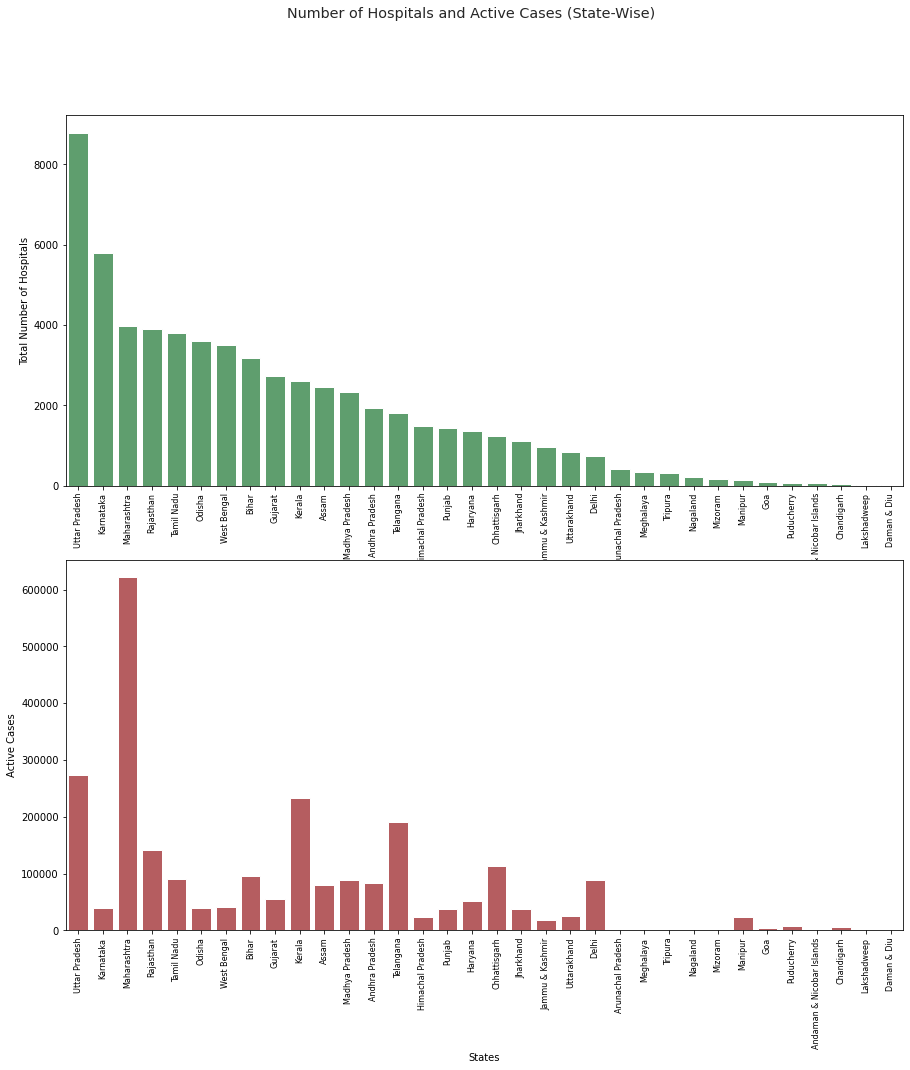

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
sns.set_theme(style="whitegrid")
df = X[['state','total_hospitals']].sort_values(by='total_hospitals', ascending=False)
sns.barplot(data=df, x='state', y='total_hospitals', color='g', ax=ax1)
ax1.set_xticklabels(df['state'], rotation=90)
ax1.tick_params(axis='x',labelsize=8)
ax1.set_ylabel("Total Number of Hospitals")
ax1.set_xlabel("States")

active_df = pd.merge(df, final_hospitals_data[['state','Active']], on='state')
sns.barplot(data=active_df, x='state', y='Active', color='r', ax=ax2)
ax2.set_xticklabels(active_df['state'], rotation=90)
ax2.tick_params(axis='x',labelsize=8)
ax2.set_ylabel("Active Cases")
ax2.set_xlabel("States")
plt.suptitle("Number of Hospitals and Active Cases (State-Wise)")
f.savefig("total_hosp.png")
plt.show()

/home/pranshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


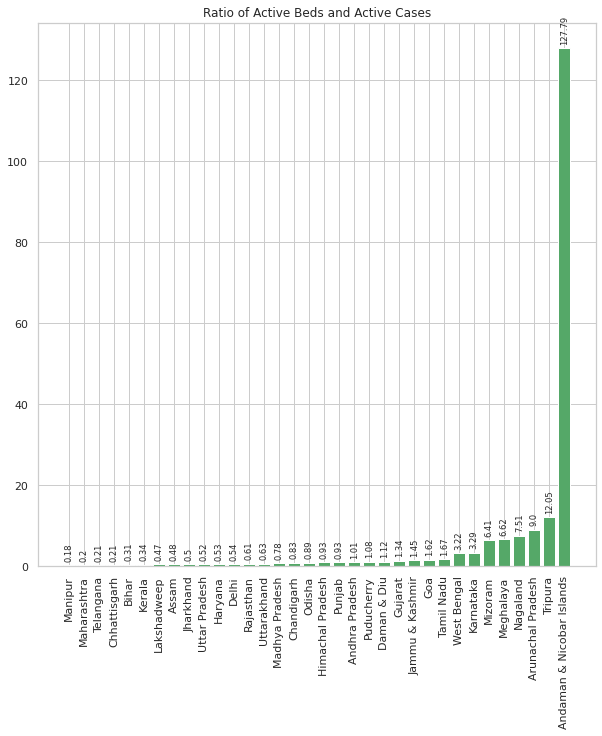

In [24]:
X['ratio_beds_active'] = X['total_beds']/X['Active']
X = X.sort_values(by='ratio_beds_active').reset_index(drop=True)
plt.figure(figsize=(10,10))
g = plt.bar(X['state'], X['ratio_beds_active'], color='g')
idx = 0
for rect in g:
    height = rect.get_height()
#     print(round(X.loc[idx,'ratio_beds_active'],2))
    plt.text(rect.get_x() + rect.get_width()/2.0, height+1.0, round(X.loc[idx,'ratio_beds_active'],2), ha='center', va='bottom', rotation=90, fontsize='x-small')
    idx +=1
plt.xticks(rotation=90)
plt.title("Ratio of Active Beds and Active Cases")
plt.show()

## Save final dataset

In [26]:
X.to_csv("../final_datasets/final_hospitals_data.csv")

### Total number of beds in each state

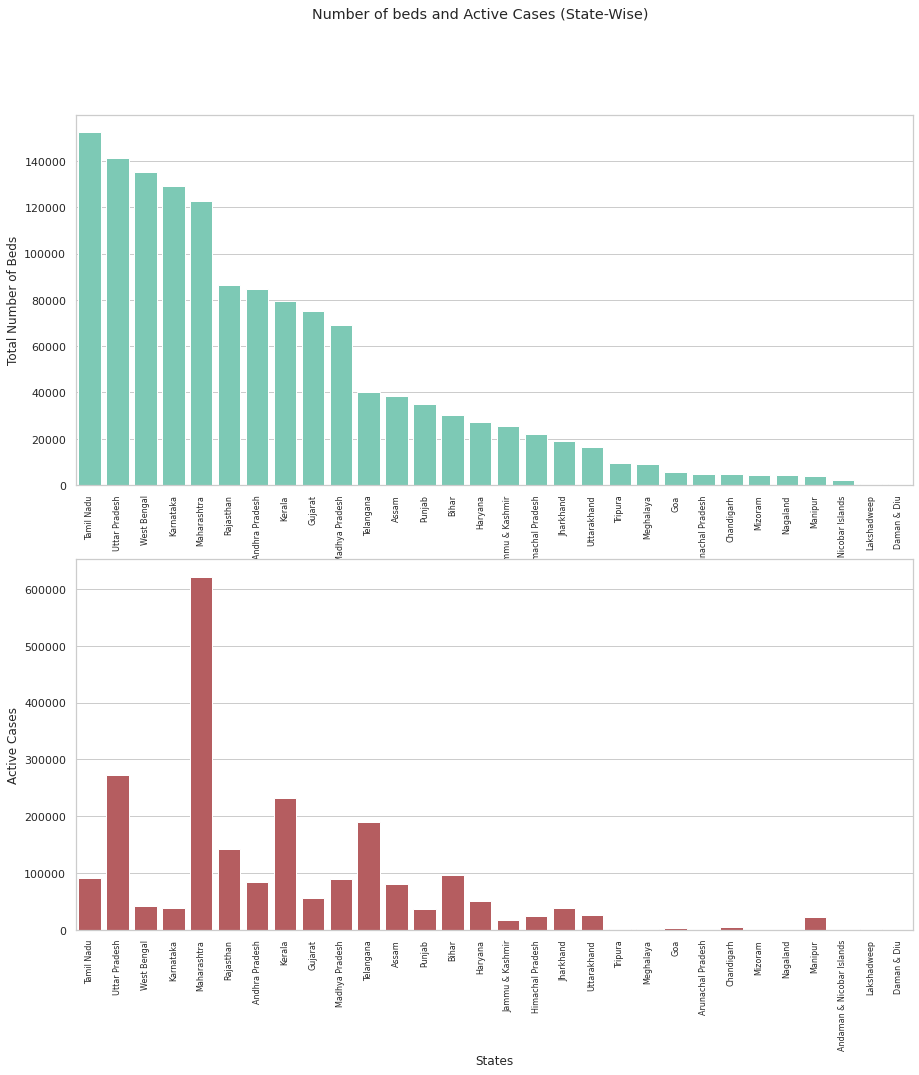

In [347]:
# plt.figure(figsize=(10,10))
# sns.set_theme(style="whitegrid")
# df = X[['state','total_beds']].sort_values(by='total_beds', ascending=False)
# sns.barplot(data=df, x='state', y='total_beds', color='#70D6BB')
# plt.xticks(rotation=90)
# plt.ylabel("Total Number of beds")
# plt.show()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
sns.set_theme(style="whitegrid")
df = X[['state','total_beds']].sort_values(by='total_beds', ascending=False)
sns.barplot(data=df, x='state', y='total_beds', color='#70D6BB', ax=ax1)
ax1.set_xticklabels(df['state'], rotation=90)
ax1.tick_params(axis='x',labelsize=8)
ax1.set_ylabel("Total Number of Beds")
ax1.set_xlabel("States")

active_df = pd.merge(df, final_hospitals_data[['state','Active']], on='state')
sns.barplot(data=active_df, x='state', y='Active', color='r', ax=ax2)
ax2.set_xticklabels(active_df['state'], rotation=90)
ax2.tick_params(axis='x',labelsize=8)
ax2.set_ylabel("Active Cases")
ax2.set_xlabel("States")
plt.suptitle("Number of beds and Active Cases (State-Wise)")
f.savefig("total_beds.png")
plt.show()